### 체육복

In [ ]:
def solution(n,lost,reserve):
    answer = 0
    cloth = [1] * n
    
    for idx in lost:
        cloth[idx-1] -= 1
    
    for idx in reserve:
        cloth[idx-1] += 1
        
    for idx,value in enumerate(cloth):
        if idx > 0 and value == 0 and cloth[idx-1] == 2:
            cloth[idx] = 1
            cloth[idx-1] = 1
        elif idx <n-1 and value == 0 and cloth[idx+1] == 2:
            cloth[idx] = 1
            cloth[idx+1] = 1
    print(cloth)
    return n-cloth.count(0)

In [5]:
a = [1,2,3,4]
a = enumerate(a)
for data in a:
    print(data)

(0, 1)
(1, 2)
(2, 3)
(3, 4)


### 큰 수 만들기
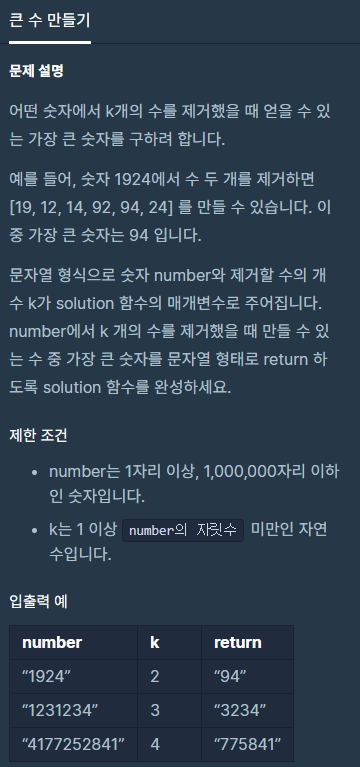

#### 모범 정답

In [3]:
def solution(number, k):
    stack = [number[0]]
    for num in number[1:]:
        # 다음 들어올 수가 더 크다면 무조건 빼고, 작으면 일단 넣고 가장 마지막에 넣은 요소는 계속 비교대상이 된다
        while len(stack) > 0 and stack[-1] < num and k > 0:
            k -= 1
            stack.pop()
        stack.append(num)
    if k != 0:
        stack = stack[:-k]
    return ''.join(stack)

In [4]:
solution("4177252841",4)

'775841'

In [19]:
a = "1234"
a = list(map(int,list(a)))
a

[1, 2, 3, 4]

#### 이것도 답인데 너무 어렵다...

In [38]:
def solution(number, k):
    length = len(number)
    if length > k:
        m = 0
        for cnt in range(k):
            for idx in range(m, length-1):
                if number[idx] < number[idx+1]:
                    number = number[:idx] + number[idx+1: ]
                    print(number)
                    length -= 1
                    if idx > 0:
                        m = idx-1
                    break
            else:
                number = number[:length-k+cnt]
                print("--",number)
                break
        return "".join([str(i) for i in number])
    else:
        return "0"

In [39]:
solution("1477252841",4)

477252841
77252841
7752841
775841


'775841'

#### for~ else 문법: for문 다 순회했을때 else문 검색

In [32]:
data = [2, 4, 5, 9, 3]
for i in data:
    if i > 10:
        break
else:
    print('10 보다 큰 수 없음')


10 보다 큰 수 없음


### 조이스틱
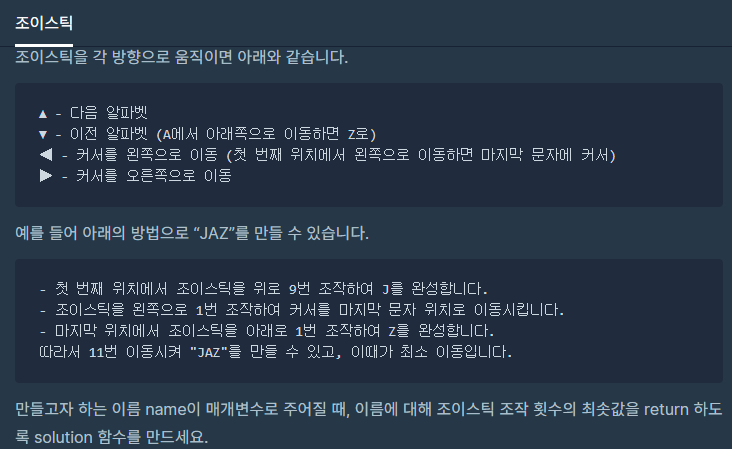

#### 내 답[오답]
> 왼쪽 출발, 오른쪽출발만 있음
- 가까운것 방문하고 돌아가는 방법은 없음

In [ ]:
#JEROEN	56
#JAN	23
#JAZ    11

def left_move(base,name):
    base,name = list(base), list(name)
    count = 0
    for index in range(0,-(len(name)),-1):
        dif1 = ord('Z') - ord(name[index]) + 1
        dif2 = ord(name[index]) - ord('A')
        dif = min(abs(dif1), abs(dif2))
        base[index] = name[index]
        count += dif
        if base == name:
            break
        count += 1
    return count

def right_move(base,name):
    base, name = list(base), list(name)
    count = 0
    for index in range(len(name)):
        dif1 = ord('Z') - ord(name[index]) + 1
        dif2 = ord(name[index]) - ord('A')
        dif = min(abs(dif1), abs(dif2))
        base[index] = name[index]
        count += dif
        if base == name:
            break
        count+=1
    return count

def solution(name):
    base = 'A'*len(name)
    l,r = left_move(base,name),right_move(base,name)
    answer = min(l,r)
    return answer

#### 내 답[정답]
> Test-Case때문에 그런지 모르겠지만 Left가 우선이여야 정답

In [23]:
def solution(name):
    base, name = ["A"]*len(name), list(name)
    ptr, count = 0,0
    while base != name:
        toLeft, toRight = 1, 1
        if name[ptr] != base[ptr]:
            find = min((ord('Z') - ord(name[ptr]) + 1),(ord(name[ptr]) - ord('A')) )
            count += find
            name[ptr] = base[ptr]
        print(name)
        if base == name:
            break
        for i in range(1,len(name)):
            if name[ptr+i] == "A":
                toRight+=1
            else:
                break
        for i in range(1,len(name)):
            if name[ptr-i] == "A":
                toLeft+=1
            else:
                break
        print("ptr",ptr)
        print("left,right : ",toLeft, toRight)
        if toLeft >= toRight:
            ptr += toRight
            count += toRight
        else:
            ptr -= toLeft
            count += toLeft
    return count

In [24]:
solution("ABABAAAAABA")

['A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'A']
ptr 0
left,right :  2 1
['A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'A']
ptr 1
left,right :  3 2
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A']
ptr 3
left,right :  5 6
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


11

### 구명보트 (최대 2명까지 탑승!!)
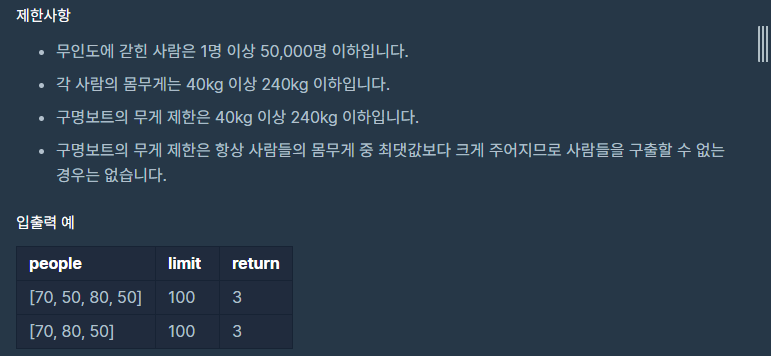

In [26]:
def solution(people, limit):
    people.sort()
    i, j = 0, len(people)-1
    cnt = 0
    while i<=j:
        cnt+=1
        if people[i] + people[j] <= limit:
            i+=1
        j-=1
    return cnt

### 섬 연결하기
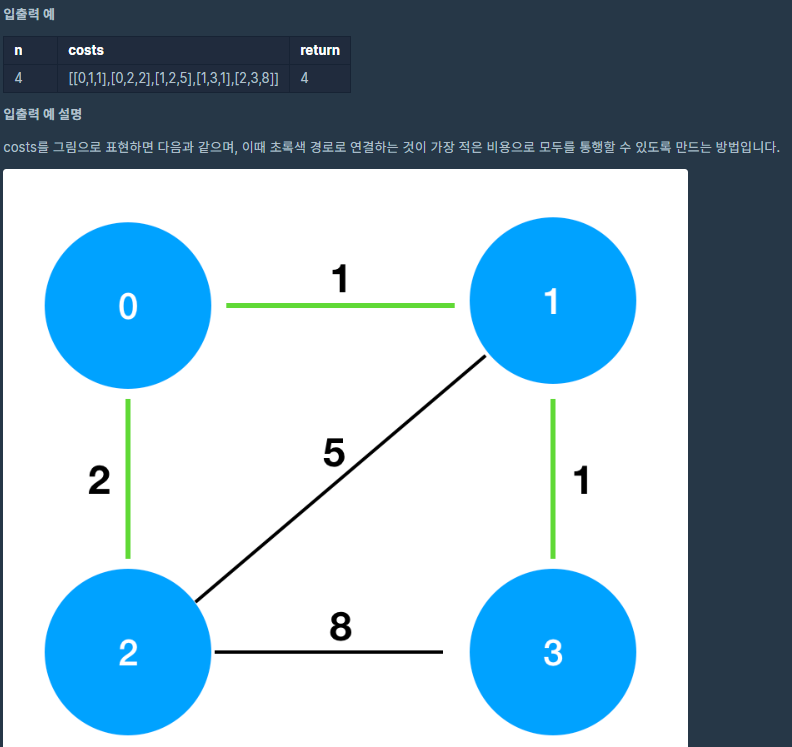

In [ ]:
def solution(n, costs):
    answer = 0
    # 가장 짧은 간선을 먼저 찾는다
    costs.sort(key = lambda x:x[2])
    
    visited = [0]*n
    # 가장 짧은 간선을 가진 노드가 출발 노드
    visited[0] = 1
    while sum(visited) != n:
        for cost in costs:
            s,e,c = cost
            # 방문한 노드 위주 확장
            if visited[s] or visited[e]:
                # 사이클, 중복 간선 방지
                if visited[s] and visited[e]:
                    continue
                else:
                    visited[s] = 1
                    visited[e] = 1
                    answer +=c
                    break
    return answer

In [29]:
a = ['1','2']
a = ''.join(a)
a

'12'